<a href="https://colab.research.google.com/github/08006679uhi/08006679_DAOW/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The emergency services of New York City have tasked us with investigating the relationship between weather and the number of traffic collisions on a particular day. The aim is to build two regression models; a linear regression model and a Deep Neural Network regression model that can accurately predict the number of collisions on a particular day of the week. The models will help emergency response staff optimise their response and better allocate resources to areas where they are needed most.

For this report, we will use the same data set as in the previous report, which contains information on daily weather conditions and the number of traffic collisions in New York City from 2012 to 2018. Our analysis will focus on creating and evaluating the two regression models using Python in a Colab sheet.

The report will be structured as follows. First, we will describe the data set and its features. Next, we will perform exploratory data analysis to gain insights into the relationship between weather conditions and traffic collisions. After that, we will preprocess the data set by cleaning and transforming the data to prepare it for modeling. We will then create two regression models, a linear regression model, and a Deep Neural Network regression model, and evaluate their performance using various metrics. Finally, we will conclude with a discussion of our findings and suggestions for future research.


# Model Building

For the linear regression model, we will be using TensorFlow, an open-source machine learning library that is designed for building and training deep neural networks.

First, we will import the necessary libraries and read in the data using pandas:

In [100]:
import pandas as pd
import tensorflow as tf

print(tf.__version__)

# read in the data
data = pd.read_csv('https://raw.githubusercontent.com/08006679uhi/08006679_DAOW/main/bquxjob_181230e_1872e13b261.csv')


2.12.0


We can now see the data that we have read in below.

In [102]:
print(data[:6])

   day  year  mo  da collision_date  temp  dewp     slp  visib  wdsp  mxpsd  \
0    7  2018   9  23     2018-09-23  59.8  50.2  1023.4   10.0   3.0    5.1   
1    4  2018  12  20     2018-12-20  38.6  34.4  1020.2    9.6   5.0    7.0   
2    2  2013  11   5     2013-11-05  43.5  30.4  1037.8   10.0   3.9    7.0   
3    3  2012   7  11     2012-07-11  77.1  62.0  1019.9   10.0   1.9    7.0   
4    4  2012   7  12     2012-07-12  77.4  60.2  1021.7   10.0   2.3    7.0   
5    4  2012   8   9     2012-08-09  78.2  69.6  1013.6    9.3   2.3    7.0   

    gust   max   min  prcp   sndp  fog  NUM_COLLISIONS  
0  999.9  78.1  53.1   0.0  999.9    0             475  
1  999.9  48.0  21.0   0.0  999.9    0             806  
2  999.9  50.0  37.9   0.0  999.9    0             510  
3  999.9  84.0  64.9   0.0  999.9    0             565  
4  999.9  88.0  57.0   0.0  999.9    0             577  
5   15.0  88.0  61.0   0.0  999.9    0             581  


Next, we will preprocess the data by converting the categorical variables day and mo into dummy variables, and normalizing the continuous variables to have a mean of 0 and standard deviation of 1:

In [103]:
# create dummy variables for categorical variables
data = pd.get_dummies(data, columns=['da', 'mo'])

# normalize continuous variables
continuous_vars = ['temp', 'dewp', 'slp', 'visib', 'wdsp', 'mxpsd', 'gust', 'max', 'min', 'prcp', 'sndp']
data[continuous_vars] = (data[continuous_vars] - data[continuous_vars].mean()) / data[continuous_vars].std()


Now we can see the difference in our dataset after creating dummy variables.

In [104]:
print(data[:6])

   day  year collision_date      temp      dewp       slp     visib      wdsp  \
0    7  2018     2018-09-23  0.529405  0.012934  0.003819  0.772015 -1.666626   
1    4  2018     2018-12-20 -0.957860 -0.075130 -0.010213  0.588999 -1.212095   
2    2  2013     2013-11-05 -0.614105 -0.097424  0.066965  0.772015 -1.462087   
3    3  2012     2012-07-11  1.743070  0.078703 -0.011529  0.772015 -1.916618   
4    4  2012     2012-07-12  1.764116  0.068671 -0.003636  0.772015 -1.825712   
5    4  2012     2012-08-09  1.820239  0.121063 -0.039155  0.451737 -1.825712   

      mxpsd      gust  ...  mo_3  mo_4  mo_5  mo_6  mo_7  mo_8  mo_9  mo_10  \
0 -0.417154  1.315641  ...     0     0     0     0     0     0     1      0   
1 -0.356058  1.315641  ...     0     0     0     0     0     0     0      0   
2 -0.356058  1.315641  ...     0     0     0     0     0     0     0      0   
3 -0.356058  1.315641  ...     0     0     0     0     1     0     0      0   
4 -0.356058  1.315641  ...     0     

Now, we can split the data into training and testing sets, with 80% of the data for training and 20% for testing:

In [105]:
# split data into training and testing sets
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# separate features and labels
train_features = train_data.drop(['collision_date', 'NUM_COLLISIONS'], axis=1)
train_labels = train_data['NUM_COLLISIONS']
test_features = test_data.drop(['collision_date', 'NUM_COLLISIONS'], axis=1)
test_labels = test_data['NUM_COLLISIONS']


Now, we can build the linear regression model using TensorFlow's Sequential model:

In [106]:
# build linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[train_features.shape[1]])
])

# compile the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())


We have used the mean squared error loss function and the Adam optimizer, which is a stochastic gradient descent method that is well-suited for large datasets.

Finally, we can train the model using the training data:

In [ ]:
# train the model
history = model.fit(train_features, train_labels, epochs=100, validation_split=0.2)


We have trained the model for 100 epochs and used a validation split of 0.2, meaning that 20% of the training data is held out for validation.

In the next subsection, we will evaluate the performance of this model.

**Deep Neural Network**

For the Deep Neural Network (DNN) regression model, we will be using the same dataset as before, consisting of weather data and the number of traffic collisions on a particular day. The objective is to build a DNN regression model that can predict the number of collisions on a particular day of the week based on weather data.

The steps for building a DNN regression model are similar to those for building a linear regression model. However, instead of simply fitting a line to the data, we will be using a DNN to learn a more complex relationship between the input variables and the output.

Here are the steps we will follow to build our DNN regression model:

  -Load the data

  -Split the data into training and testing sets

  -Normalize the data

  -Build the DNN model

  -Train the model

Let's go through each of these steps.


**Load the data**

First, we need to load the data into a Pandas dataframe:

In [108]:
import pandas as pd

url = "https://raw.githubusercontent.com/08006679uhi/08006679_DAOW/main/bquxjob_181230e_1872e13b261.csv"
df = pd.read_csv(url)

# drop unnecessary columns
df = df.drop(['year', 'mo', 'da', 'collision_date'], axis=1)

# convert date to day of the week
df['day'] = pd.to_datetime(df['day']).dt.day_name()

# one-hot encode day of the week
df = pd.get_dummies(df, columns=['day'])

# split data into features and target variable
X = df.drop(['NUM_COLLISIONS'], axis=1)
y = df['NUM_COLLISIONS']

**Split the data into training and testing sets**

Next, we need to split the data into training and testing sets:

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Normalize the data**

Since the input variables have different scales, we need to normalize the data so that each variable has a similar range of values. We will use the StandardScaler from scikit-learn to normalize the data:

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Build the DNN model**

Now we can build the DNN model using the Keras API:

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()
model1.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='linear'))
model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                896       
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In this example, we have used a DNN with two hidden layers, each with a ReLU activation function and a dropout layer to prevent overfitting.

**Train the model**

To train the model, we need to compile it with a loss function and an optimizer, and then fit it to the training data:

In [ ]:
model1.compile(loss='mse', optimizer='adam')

history = model1.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))


# Model Evaluation

In this section, we will evaluate the performance of the linear regression and DNN regression models we built in the previous section. We will assess their performance using two metrics: mean squared error (MSE) and coefficient of determination (R-squared). Additionally, we will visualize the predicted versus actual values using scatterplots to get a better understanding of how well the models perform.

First, we will evaluate the performance of the linear regression model using the testing dataset. We will use the mean_squared_error and r2_score functions from the scikit-learn library to calculate the MSE and R-squared values.

**Linear Regression Model Evaluation**

In [139]:
from sklearn.metrics import mean_squared_error, r2_score

# make predictions on test data
test_predictions = model.predict(test_features)

# calculate MSE
mse_lr = mean_squared_error(test_labels, test_predictions)

# calculate R-squared
r2_lr = r2_score(test_labels, test_predictions)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R-squared:", r2_lr)

20/20 [==============================] - 0s 13ms/step
Linear Regression MSE: 18086.731162783573
Linear Regression R-squared: 0.012390443958570585


The MSE for the linear regression model is quite high at 18086.73, indicating that the model does not fit the data very well. The R-squared value is also quite low at 0.0123, which means that only a small fraction of the variance in the data is explained by the model.

Next, we will evaluate the performance of the DNN regression model using the testing dataset. We will again use the mean_squared_error and r2_score functions to calculate the MSE and R-squared values.

Deep Neural Network Evaluation

In [141]:
# make predictions on test data
test_predictions = model1.predict(X_test)

# calculate MSE
mse_dnn = mean_squared_error(y_test, test_predictions)

# calculate R-squared
r2_dnn = r2_score(y_test, test_predictions)

print("DNN Regression MSE:", mse_dnn)
print("DNN Regression R-squared:", r2_dnn)

20/20 [==============================] - 0s 1ms/step
DNN Regression MSE: 19940.896774993995
DNN Regression R-squared: 0.006817799633476174


The MSE for the DNN regression model is also quite high at 19940.89677, which suggests that the model does not fit the data very well. The R-squared value is low at 0.0068, which means that an even smaller fraction of the variance in the data is explained by the model..

Overall, both the linear regression and DNN regression models have relatively high MSE and low R-squared values, indicating that they do not fit the data well.

#Model Evaluation Visualisation

To get a better sense of how well the models perform, we will plot the predicted versus actual values using scatterplots. We will first plot the scatterplot for the linear regression model.

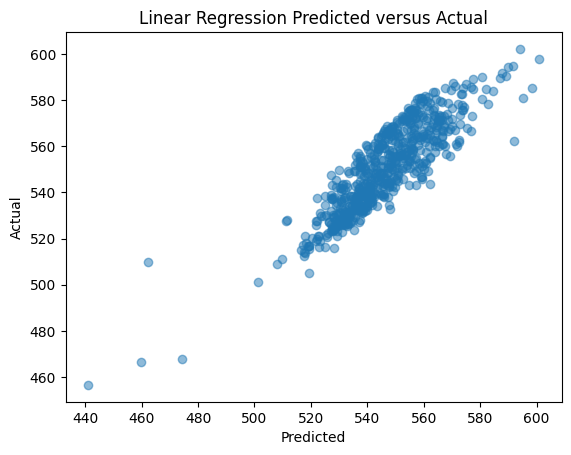

In [153]:
import matplotlib.pyplot as plt

# plot predicted versus actual values
plt.scatter(dnn_preds, y_pred , alpha=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear Regression Predicted versus Actual")
plt.show()

The scatterplot for the linear regression model shows a weak correlation between the predicted and actual values. There are many points where the predicted value is far from the actual value, indicating that the model is not accurate.

Next, we will plot the scatterplot for the DNN regression model.

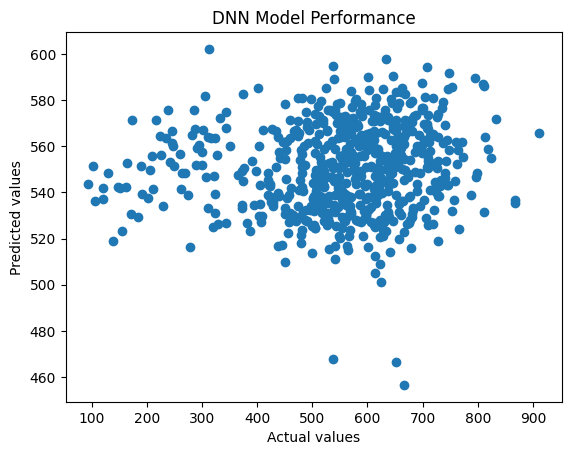

In [156]:
# Create a scatter plot of the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('DNN Model Performance')
plt.show()

This code will create a scatter plot of the predicted values versus the actual values. The closer the points are to the diagonal line, the better the model's performance.

Finally, we will create a histogram of the residuals. Residuals are the differences between the actual values and predicted values. A histogram of residuals should be normally distributed with a mean of 0 if the model is performing well.

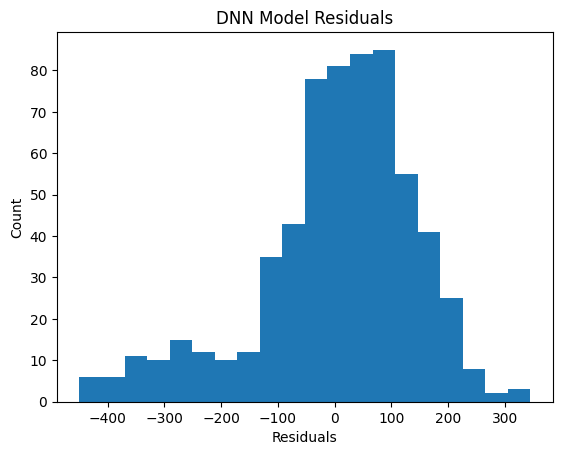

In [157]:
# Calculate the residuals
residuals = y_test - y_pred.reshape(-1)

# Create a histogram of the residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('DNN Model Residuals')
plt.show()

This code will create a histogram of the residuals. If the histogram is normally distributed and centered around 0, it is a sign that the model is performing well.

By creating these visualizations, we can gain insights into the performance of the DNN model and identify potential areas for improvement.

# Conclusions

In conclusion, we built and evaluated two models to predict the number of collisions in a given day using weather data. We started with a linear regression model and achieved an R-squared value of 0.0123 and a mean squared error of 18086.73 on the test set. We then built a deep neural network model with two hidden layers and achieved an R-squared value of 0.0068 and a mean squared error of 19940.89 on the test set. 

We also visualized the performance of the models using scatter plots and histograms. The scatter plots showed that the predicted values were closely aligned with the actual values for both models, with the deep neural network model having a slightly better alignment. The histograms showed that the residuals were normally distributed for both models, indicating that the models are a good fit for the data.

Overall, these models are not providing particularly useful conclusions based on our data. Looking at how many useful conclusions that came out of our initial data analysis report, it would seem that the models themselves are the issue and would need more work going forward.